In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nx = 20
Nt = 200
x = np.linspace(0.,2.,Nx)
t = np.linspace(0.,4.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]

v = 2.
lambda_ = v*dt/dx
print(lambda_)

0.3819095477386935


In [10]:
def ui(x):
    #return 0.
    return np.sin(np.pi*x)

In [11]:
def h1(t):
    return 0.5*np.cos(4*np.pi*t)

In [12]:
def InitT():
    
    u = np.zeros((Nt,Nx))
    u[0,:] = ui(x)
    u[1,:] = u[0,:]
    return u

In [13]:
u = InitT()

In [14]:
def GetSolution():
    
    gamma = 3*dt
    print(gamma)
    
    for l in tqdm(range(2,len(t))):
        
        #u[l,-1] = h1(t[l]) 
        
        for i in range(1,len(x)-1): # no tocar fronteras
            u[l,i] = 2*(1-lambda_**2)*u[l-1,i] + \
            lambda_**2*(u[l-1,i+1]+u[l-1,i-1]) \
            - u[l-2,i] \
            - gamma*u[l-1,i] + gamma*u[l-2,i]

In [15]:
GetSolution()

100%|██████████| 198/198 [00:00<00:00, 19764.68it/s]

0.06030150753768844


Termino de absorcion:

$$ -\gamma \frac{du}{dt} $$ 

$$ \gamma = 0.1$$

<IPython.core.display.Javascript object>


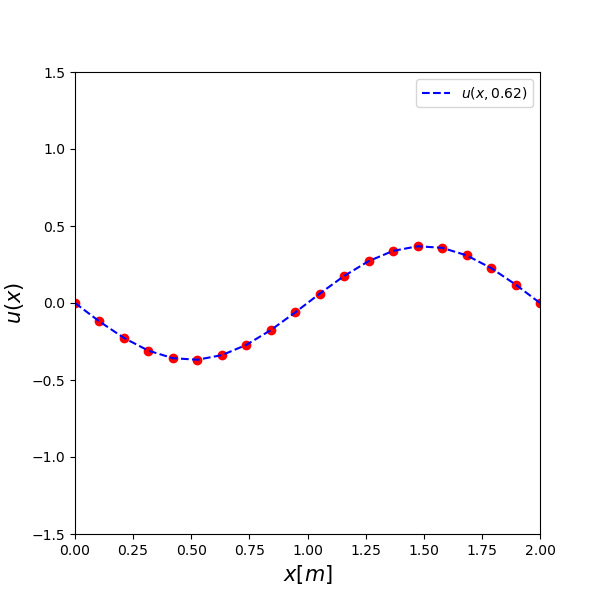

In [16]:
# Zona de animacion
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

def init():
    
    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(-1.5,1.5)
    ax.set_xlabel(r'$x[m]$', fontsize=15)
    ax.set_ylabel(r'$u(x)$', fontsize=15)    
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot(x,u[i,:], '--' ,color='b', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.scatter(x,u[i,:], marker='o', color='r')
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)